In [1]:
!cat /proc/cpuinfo

'cat' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
!pip install keras -tuner

                                              0.0/1.1 MB ? eta -:--:--
     -----------                              0.3/1.1 MB 7.0 MB/s eta 0:00:01
     ---------------------------------------  1.1/1.1 MB 14.3 MB/s eta 0:00:01
     ---------------------------------------- 1.1/1.1 MB 11.9 MB/s eta 0:00:00
  Using cached absl_py-2.1.0-py3-none-any.whl (133 kB)
                                              0.0/16.6 MB ? eta -:--:--
     ---                                      1.3/16.6 MB 26.8 MB/s eta 0:00:01
     ------                                   2.8/16.6 MB 30.4 MB/s eta 0:00:01
     ----------                               4.4/16.6 MB 31.0 MB/s eta 0:00:01
     --------------                           5.9/16.6 MB 31.5 MB/s eta 0:00:01
     -----------------                        7.4/16.6 MB 31.7 MB/s eta 0:00:01
     ---------------------                    8.9/16.6 MB 31.7 MB/s eta 0:00:01
     ------------------------                10.4/16.6 MB 31.2 MB/s eta 0:00:01
     -

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.
tables 3.8.0 requires cython>=0.29.21, which is not installed.
transformers 2.1.1 requires sentencepiece, which is not installed.
tensorflow-intel 2.16.1 requires ml-dtypes~=0.3.1, but you have ml-dtypes 0.4.0 which is incompatible.
tensorflow-intel 2.16.1 requires numpy<2.0.0,>=1.23.5; python_version <= "3.11", but you have numpy 2.0.1 which is incompatible.
mdit-py-plugins 0.3.0 requires markdown-it-py<3.0.0,>=1.0.0, but you have markdown-it-py 3.0.0 which is incompatible.
numba 0.57.0 requires numpy<1.25,>=1.21, but you have numpy 2.0.1 which is incompatible.
panel 1.1.0 requires markdown-it-py<3, but you have markdown-it-py 3.0.0 which is incompatible.
python-lsp-black 1.2.1 requires black

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#utility & processing
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#cnn architecture
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#keras tuner
import keras_tuner
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

#transfer learning
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.xception import Xception
import warnings
warnings.filterwarnings('ignore')


print('we are currently using tensorflow version', tf.__version__)

ModuleNotFoundError: No module named 'keras_tuner'

In [4]:
!pip install keras_tuner

                                              0.0/129.1 kB ? eta -:--:--
     -------------------------------------- 129.1/129.1 kB 3.8 MB/s eta 0:00:00


In [5]:
#basics
import pandas as pd
import numpy as np
import tensorflow as tf
import keras

# visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#utility & processing
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

#cnn architecture
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.models import Sequential

#callbacks
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

#data augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#keras tuner
import keras_tuner
from keras_tuner import RandomSearch
from keras_tuner.engine.hyperparameters import HyperParameters

#transfer learning
from keras.applications.vgg16 import VGG16
from keras.applications.inception_v3 import InceptionV3
from keras.applications.resnet_v2 import ResNet152V2
from keras.applications.xception import Xception

#warnings
import warnings
warnings.filterwarnings('ignore')


print('we are currently using tensorflow version', tf.__version__)

we are currently using tensorflow version 2.16.1


In [6]:
input_shape_2D=(224,224)
input_shape_3D= (224,224,3)
seed=1
batch_size=32
epochs=30
stopper=EarlyStopping(patience=5)

In [9]:
data_ds= tf.keras.utils.image_dataset_from_directory(
    directory=r'C:\Users\PARI\Downloads\rice_leaf_diseases',
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=None,
    image_size=input_shape_2D,
    seed=seed
)

Found 120 files belonging to 3 classes.


In [10]:
class_names = data_ds.class_names

print("Class Names:", class_names)

Class Names: ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']


In [11]:
def show_images(images, labels):
    fig, axes = plt.subplots(8, 4, figsize=(10, 10))
    axes = axes.flatten()
    for i, (img, label) in enumerate(zip(images, labels)):
        axes[i].imshow(img.numpy().astype("uint8"))
        axes[i].set_title(f"Label: {label}")
        axes[i].axis("off")
    plt.tight_layout()
    plt.show()

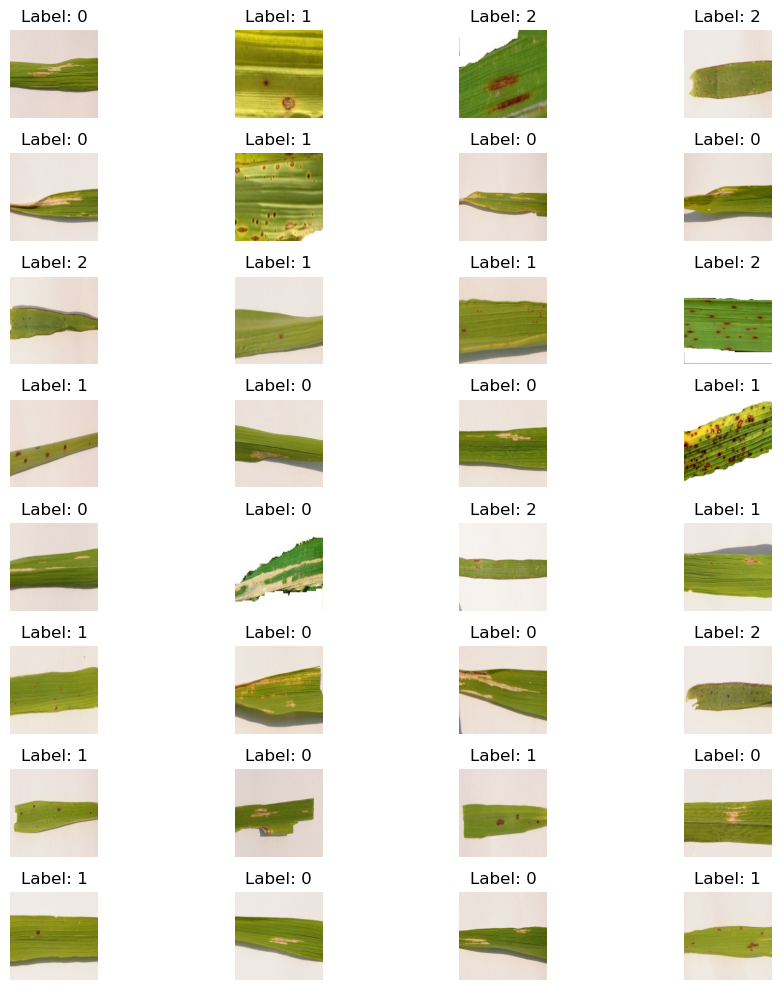

In [12]:
batched_ds = data_ds.batch(batch_size)

batch = next(iter(batched_ds))
images, labels = batch

images, labels = next(iter(batched_ds))
show_images(images, labels)

In [13]:
X=[]
y= []

for image, label in data_ds.batch(119):
  for img, lab in zip(image, label):
    X.append(img)
    y.append(lab.numpy())

In [14]:
X= np.array(X)
y= np.array(y)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=seed)

In [16]:
X_train = X_train/255
X_test = X_test/255

In [17]:
print("shape of X_train_scaled:", X_train.shape)
print("shape of y_train:", y_train.shape)
print("shape of X_test_scaled:", X_test.shape)
print("shape of y_test:", y_test.shape)

shape of X_train_scaled: (90, 224, 224, 3)
shape of y_train: (90,)
shape of X_test_scaled: (30, 224, 224, 3)
shape of y_test: (30,)


In [18]:
y_train = to_categorical(y_train, num_classes=len(class_names))
y_test = to_categorical(y_test, num_classes=len(class_names))

In [19]:
own_model=Sequential()

# adding first convloutional layer
own_model.add(Conv2D(16, kernel_size=(3,3), padding='same', activation='relu', input_shape=input_shape_3D))
own_model.add(MaxPooling2D())

# adding second convloutional layer
own_model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
own_model.add(MaxPooling2D())

# adding third convloutional layer
own_model.add(Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
own_model.add(MaxPooling2D())

# adding flatten layer
own_model.add(Flatten())

# adding fully connected layers
own_model.add(Dense(200, activation='relu'))

#adding output layer : number of classes are 3
own_model.add(Dense(3, activation='softmax'))

In [20]:
own_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 200)            │    10,035,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           603 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,059,587 (38.37 MB)

 Trainable params: 10,059,587 (38.37 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
own_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
from keras.callbacks import ModelCheckpoint
checkpointer_own = ModelCheckpoint(filepath='own_model.weights.best.keras', verbose=3, save_best_only=True)

history=own_model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs=epochs, callbacks=[checkpointer_own, stopper])

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 267ms/step - accuracy: 0.2414 - loss: 6.3108
Epoch 1: val_loss improved from inf to 2.60700, saving model to own_model.weights.best.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.2450 - loss: 6.6922 - val_accuracy: 0.1333 - val_loss: 2.6070
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step - accuracy: 0.3885 - loss: 1.7415
Epoch 2: val_loss improved from 2.60700 to 1.53303, saving model to own_model.weights.best.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 744ms/step - accuracy: 0.3914 - loss: 1.7060 - val_accuracy: 0.1667 - val_loss: 1.5330
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 246ms/step - accuracy: 0.4250 - loss: 1.1850
Epoch 3: val_loss improved from 1.53303 to 1.18136, saving model to own_model.weights.best.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 653ms/step - accuracy: 0.4187 - loss: 1.1752 - val_accuracy: 0.1333 - val_loss: 1.1814
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.3313 - loss: 1.0528
Epoch 4: val_loss improved from 1.1

In [24]:
def plot_performance(model_name, acc, val_acc, loss, val_loss):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.plot(loss)
  plt.plot(val_loss)
  plt.title('{} : Loss'.format(model_name), fontsize=12, fontweight='bold')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper right')

  plt.subplot(1,2,2)
  plt.plot(acc)
  plt.plot(val_acc)
  plt.title('{} : Accuracy'.format(model_name), fontsize=12, fontweight='bold')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['train', 'test'], loc='upper right')

  plt.tight_layout()

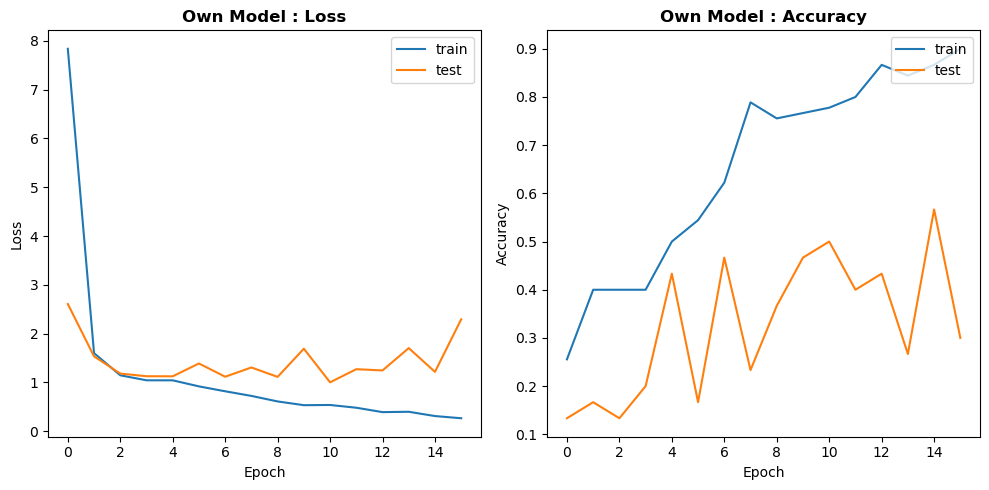

In [25]:
plot_performance(model_name= 'Own Model',
                 acc=history.history['accuracy'], 
                 val_acc=history.history['val_accuracy'],
                 loss=history.history['loss'], 
                 val_loss=history.history['val_loss'])

In [26]:
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.3,
    height_shift_range=0.3,
    horizontal_flip=True,
    vertical_flip=True)

In [27]:
from keras.callbacks import ModelCheckpoint
checkpointer_own_aug = ModelCheckpoint(filepath='own_model_aug.weights.best.keras', verbose=3, save_best_only=True)

aug_history= own_model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train)//batch_size, 
    epochs=epochs,
    callbacks=[stopper, checkpointer_own_aug]
)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.5234 - loss: 2.2485
Epoch 1: val_loss improved from inf to 1.67948, saving model to own_model_aug.weights.best.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.5417 - loss: 2.1842 - val_accuracy: 0.5333 - val_loss: 1.6795
Epoch 2/30
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step - accuracy: 0.4615 - loss: 1.2536
Epoch 2: val_loss did not improve from 1.67948
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.4615 - loss: 1.2536 - val_accuracy: 0.5000 - val_loss: 1.6980
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.3513 - loss: 1.3417
Epoch 3: val_loss improved from 1.67948 to 1.00846, saving model to own_model_aug.weights.best.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.3434 - loss: 1.3516 - val_accuracy: 0.5333 - val_loss: 1.0085
Epoch 4/30
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step - accuracy: 0.5625 - loss: 0.9327
Epoch 4: val_loss improved from 1.00846 to 1.00691, saving model to own_model_au

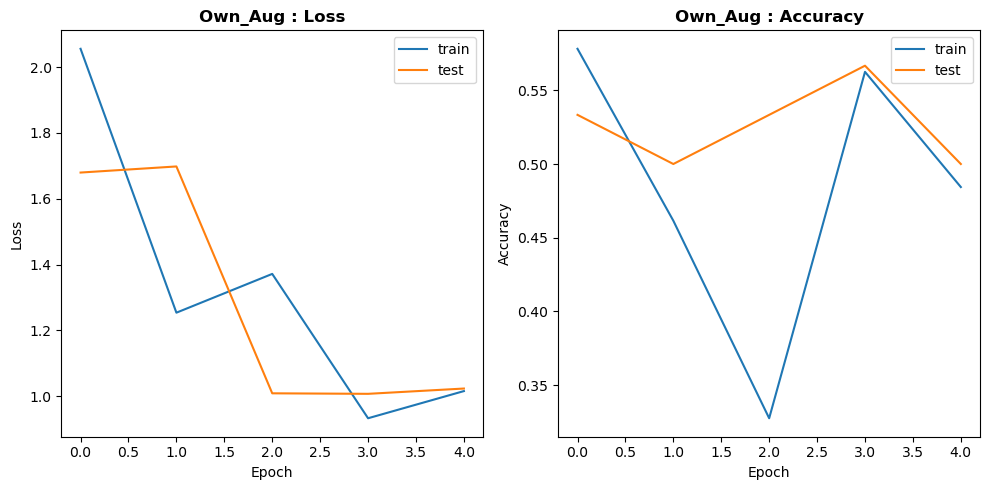

In [28]:
plot_performance(model_name='Own_Aug',
                  acc=aug_history.history['accuracy'], 
                 val_acc=aug_history.history['val_accuracy'],
                 loss=aug_history.history['loss'], 
                 val_loss=aug_history.history['val_loss'])

In [29]:
def build_model(hp):
  new_model=Sequential()

  # adding first convloutional layer
  new_model.add(Conv2D(
      filters= hp.Int('conv_1_filter', min_value=8, max_value=32, step=8),
      kernel_size=hp.Choice('conv_1_kernel', values= [2,3]),
      padding=hp.Choice('conv_1_pad', values=['same', 'valid']),
      activation='relu', input_shape=input_shape_3D))
  new_model.add(MaxPooling2D())

  # adding second convloutional layer
  new_model.add(Conv2D(
      filters= hp.Int('conv_2_filter', min_value=16, max_value=64, step=16),
      kernel_size=hp.Choice('conv_2_kernel', values= [2,3]),
      padding=hp.Choice('conv_2_pad', values=['same', 'valid']),
      activation='relu'))
  new_model.add(MaxPooling2D())

  # adding third convloutional layer
  new_model.add(Conv2D(
      filters= hp.Int('conv_3_filter', min_value=32, max_value=64, step=16),
      kernel_size=hp.Choice('conv_3_kernel', values= [2,3]),
      padding=hp.Choice('conv_3_pad', values=['same', 'valid']),
      activation='relu'))
  new_model.add(MaxPooling2D())

  # adding flatten layer
  new_model.add(Flatten())

  # adding fully connected layers
  new_model.add(Dense(
      units=hp.Int('dense_1_units', min_value=50, max_value=250, step=50),
      activation='relu'
      ))

  #adding output layer : number of classes are 3
  new_model.add(Dense(3, activation='softmax'))

  new_model.compile(
      optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-1, 1e-2, 1e-3])),
      loss='categorical_crossentropy',
      metrics=['accuracy']
  )

  return new_model

In [30]:
tuner_search=RandomSearch(build_model, objective='val_accuracy', max_trials=3, directory='output', project_name='RiceLeafDisease')

In [31]:
tuner_search.search(
    datagen.flow(X_train, y_train),
    validation_data=(X_test, y_test), 
    epochs=10
)

Trial 3 Complete [00h 00m 29s]
val_accuracy: 0.4333333373069763

Best val_accuracy So Far: 0.5666666626930237
Total elapsed time: 00h 01m 38s


In [32]:
tuned_model=tuner_search.get_best_models(num_models=1)[0]

In [33]:
tuned_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 24)   │           672 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 24)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 111, 111, 64)   │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 55, 55, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 55, 55, 48)     │        12,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 27, 27, 48)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 34992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 150)            │     5,248,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           453 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,268,619 (20.10 MB)

 Trainable params: 5,268,619 (20.10 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
checkpointer_own_tuned = ModelCheckpoint(filepath='own_model_tuned.weights.best.keras', verbose=3, save_best_only=True)

tuned_history= tuned_model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train)//batch_size, 
    initial_epoch=10,
    epochs=epochs,
    callbacks=[stopper, checkpointer_own_tuned]
)

Epoch 11/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.4589 - loss: 1.0793
Epoch 11: val_loss improved from inf to 2.00004, saving model to own_model_tuned.weights.best.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4324 - loss: 1.1170 - val_accuracy: 0.1333 - val_loss: 2.0000
Epoch 12/30
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 313ms/step - accuracy: 0.4062 - loss: 1.3299
Epoch 12: val_loss improved from 2.00004 to 1.48557, saving model to own_model_tuned.weights.best.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 497ms/step - accuracy: 0.4062 - loss: 1.3299 - val_accuracy: 0.1667 - val_loss: 1.4856
Epoch 13/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 338ms/step - accuracy: 0.4297 - loss: 1.0288
Epoch 13: val_loss improved from 1.48557 to 1.06835, saving model to own_model_tuned.weights.best.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 883ms/step - accuracy: 0.4271 - loss: 1.0235 - val_accuracy: 0.3667 - val_loss: 1.0684
Epoch 14/30
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step - accuracy: 0.3077 - loss: 1.1401
Epoch 14: 

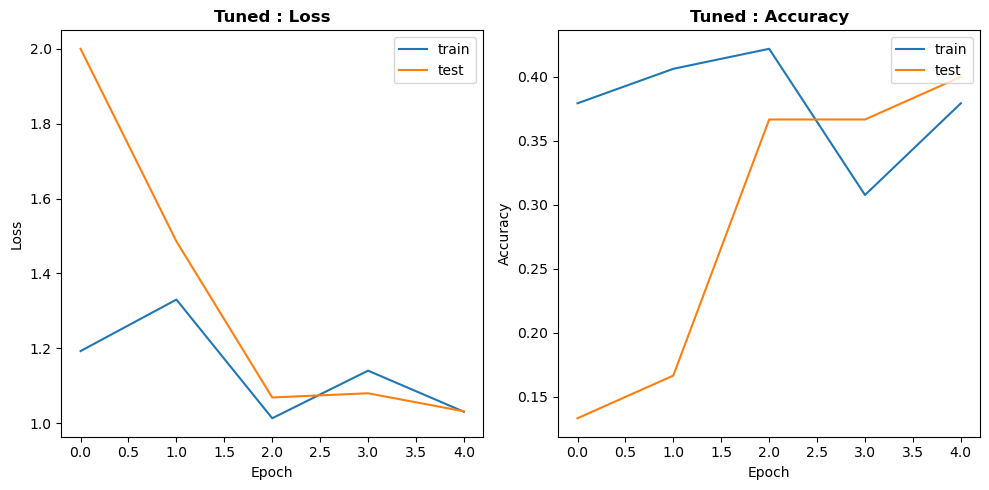

In [35]:
plot_performance(model_name='Tuned',
                  acc=tuned_history.history['accuracy'], 
                 val_acc=tuned_history.history['val_accuracy'],
                 loss=tuned_history.history['loss'], 
                 val_loss=tuned_history.history['val_loss'])

In [36]:
inception_base=tf.keras.applications.InceptionV3(
    include_top=False,
    weights="imagenet",
    input_shape=input_shape_3D,
)

#unfreezing the convloution layers
inception_base.trainable=True
set_trainable=False

for layer in inception_base.layers:
  if layer.name=='mixed9_0':
    set_trainable=True
  
  if set_trainable==True:
    layer.trainable=True

  else:
    layer.trainable=False


# building fully connected layers
inception_model= Sequential()

inception_model.add(inception_base)
inception_model.add(Flatten())

inception_model.add(Dense(128, activation='relu'))
inception_model.add(Dense(3, activation='softmax'))


#compiling 
inception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step


In [43]:
inception_model.build(input_shape=(None, 224, 224, 3))
tf.keras.utils.plot_model(
    inception_model,
    show_shapes=True,
    show_layer_names=True,
    show_layer_activations=True
)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [39]:
pip install pydot

In [44]:
checkpointer_inception = ModelCheckpoint(filepath='inception.weights.best.keras', verbose=3, save_best_only=True)

inception_history= inception_model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    callbacks=[stopper, checkpointer_inception]
)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.3811 - loss: 13.1928
Epoch 1: val_loss improved from inf to 18.86410, saving model to inception.weights.best.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 33s 6s/step - accuracy: 0.3803 - loss: 15.0240 - val_accuracy: 0.4333 - val_loss: 18.8641
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4478 - loss: 5.7012
Epoch 2: val_loss improved from 18.86410 to 13.03584, saving model to inception.weights.best.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.4803 - loss: 5.1491 - val_accuracy: 0.4667 - val_loss: 13.0358
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7801 - loss: 0.8147
Epoch 3: val_loss improved from 13.03584 to 3.72295, saving model to inception.weights.best.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.7795 - loss: 0.8150 - val_accuracy: 0.5333 - val_loss: 3.7229
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9287 - loss: 0.1590
Epoch 4: val_loss improved from 3.72295 to 2

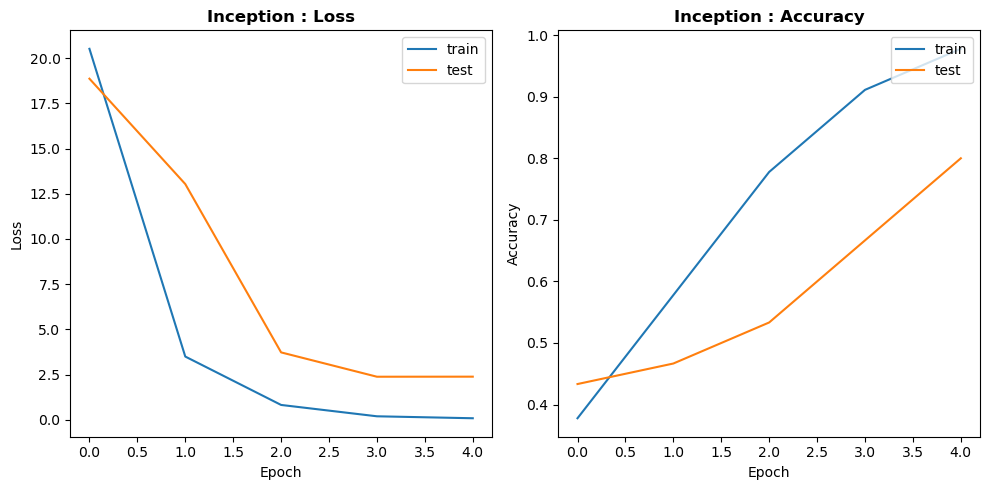

In [45]:
plot_performance(model_name='Inception',
                acc=inception_history.history['accuracy'], 
                 val_acc=inception_history.history['val_accuracy'],
                 loss=inception_history.history['loss'], 
                 val_loss=inception_history.history['val_loss'])

In [46]:
checkpointer_inception_aug = ModelCheckpoint(filepath='inception_aug.weights.best.keras', verbose=3, save_best_only=True)

inception_history_aug= inception_model.fit(
    datagen.flow(X_train,y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train)//batch_size,
    epochs=epochs,
    callbacks=[stopper, checkpointer_inception_aug]
)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.7856 - loss: 0.6169  
Epoch 1: val_loss improved from inf to 2.08883, saving model to inception_aug.weights.best.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.7766 - loss: 0.6404 - val_accuracy: 0.8000 - val_loss: 2.0888
Epoch 2/30
1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7500 - loss: 0.5483
Epoch 2: val_loss did not improve from 2.08883
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.7500 - loss: 0.5483 - val_accuracy: 0.7667 - val_loss: 2.1856
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.9078 - loss: 0.4754
Epoch 3: val_loss did not improve from 2.08883
2/2 ━━━━━━━━━━━━━━━━━━━━ 5s 2s/step - accuracy: 0.9156 - loss: 0.4390 - val_accuracy: 0.7333 - val_loss: 3.1640
Epoch 4/30
1/2 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8750 - loss: 0.3577
Epoch 4: val_loss did not improve from 2.08883
2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 1s/step - accuracy: 0.8750 - loss: 0.3577 - val_accuracy: 0.7333 - val_

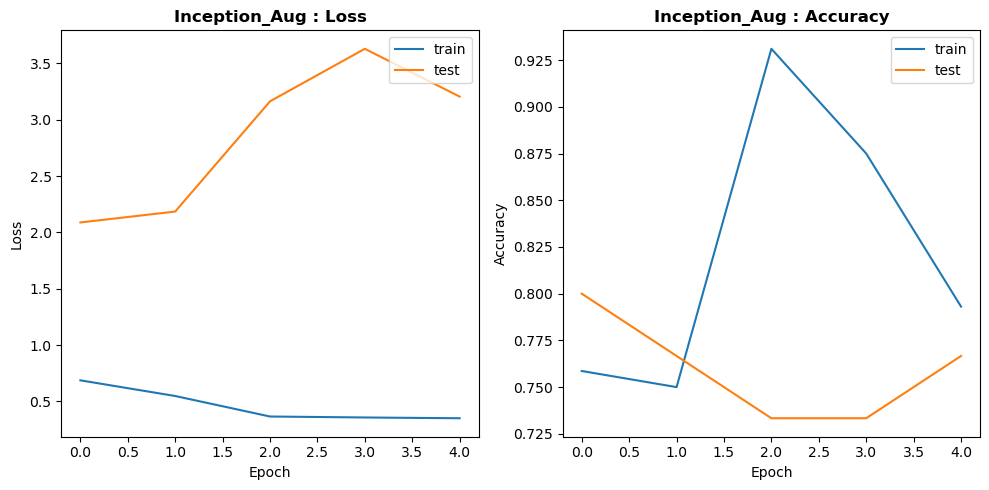

In [47]:
plot_performance(model_name='Inception_Aug',
                acc=inception_history_aug.history['accuracy'], 
                 val_acc=inception_history_aug.history['val_accuracy'],
                 loss=inception_history_aug.history['loss'], 
                 val_loss=inception_history_aug.history['val_loss'])

In [48]:
xception_base= Xception(
    include_top=False,
    weights='imagenet',
    input_shape=input_shape_3D
)

xception_base.trainable=True
set_trainable=False

for layer in xception_base.layers:
  if layer.name=='add_8':
    set_trainable=True

  if set_trainable==True:
    layer.trainable=True
  else:
    layer.trainable=False

#building fully connected layers
xception_model=Sequential()

xception_model.add(xception_base)
xception_model.add(Flatten())

xception_model.add(Dense(128, activation='relu'))
xception_model.add(Dense(3, activation='softmax'))

xception_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


In [49]:
tf.keras.utils.plot_model(
    xception_model,
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
    layer_range=None,
    show_layer_activations=True
)

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [50]:
checkpointer_xception = ModelCheckpoint(filepath='xception.weights.best.keras', verbose=3, save_best_only=True)

xception_history=xception_model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=epochs,
    callbacks=[stopper, checkpointer_xception]
)

Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3112 - loss: 4.2783 
Epoch 1: val_loss improved from inf to 21.60494, saving model to xception.weights.best.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 38s 8s/step - accuracy: 0.3223 - loss: 4.4592 - val_accuracy: 0.1333 - val_loss: 21.6049
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.5089 - loss: 1.0884
Epoch 2: val_loss improved from 21.60494 to 5.47654, saving model to xception.weights.best.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 24s 10s/step - accuracy: 0.5095 - loss: 1.0879 - val_accuracy: 0.1333 - val_loss: 5.4765
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.5573 - loss: 1.0355
Epoch 3: val_loss improved from 5.47654 to 3.95841, saving model to xception.weights.best.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 8s/step - accuracy: 0.5430 - loss: 1.0330 - val_accuracy: 0.1333 - val_loss: 3.9584
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.6047 - loss: 0.8524
Epoch 4: val_loss did not improve from 3.95841
3

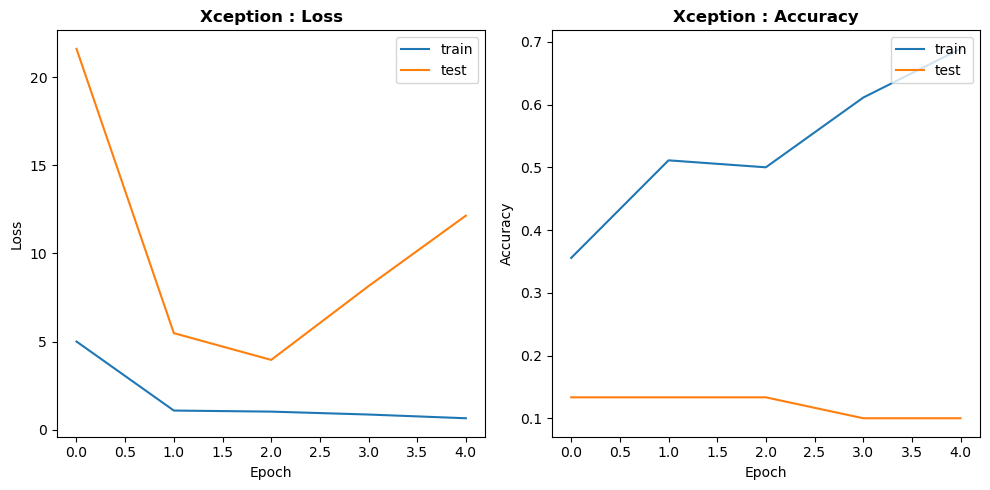

In [51]:
plot_performance(model_name='Xception',
                acc=xception_history.history['accuracy'], 
                 val_acc=xception_history.history['val_accuracy'],
                 loss=xception_history.history['loss'], 
                 val_loss=xception_history.history['val_loss'])

In [52]:
checkpointer_xception_aug = ModelCheckpoint(filepath='xception_aug.weights.best.keras', verbose=3, save_best_only=True)

xception_history_aug=xception_model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    validation_data=(X_test, y_test),
    steps_per_epoch=len(X_train)//batch_size,
    epochs=epochs,
    callbacks=[stopper, checkpointer_xception_aug]
)

Epoch 1/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.5690 - loss: 1.0259  
Epoch 1: val_loss improved from inf to 10.82805, saving model to xception_aug.weights.best.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 24s 10s/step - accuracy: 0.5920 - loss: 0.9617 - val_accuracy: 0.1667 - val_loss: 10.8281
Epoch 2/30
1/2 ━━━━━━━━━━━━━━━━━━━━ 3s 4s/step - accuracy: 0.7500 - loss: 0.6546
Epoch 2: val_loss improved from 10.82805 to 9.44494, saving model to xception_aug.weights.best.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 9s 5s/step - accuracy: 0.7500 - loss: 0.6546 - val_accuracy: 0.3000 - val_loss: 9.4449
Epoch 3/30
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.7457 - loss: 0.6028
Epoch 3: val_loss improved from 9.44494 to 7.87416, saving model to xception_aug.weights.best.keras
2/2 ━━━━━━━━━━━━━━━━━━━━ 14s 9s/step - accuracy: 0.7443 - loss: 0.6232 - val_accuracy: 0.4000 - val_loss: 7.8742
Epoch 4/30
1/2 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.8125 - loss: 0.5407
Epoch 4: val_loss improved from 7.87

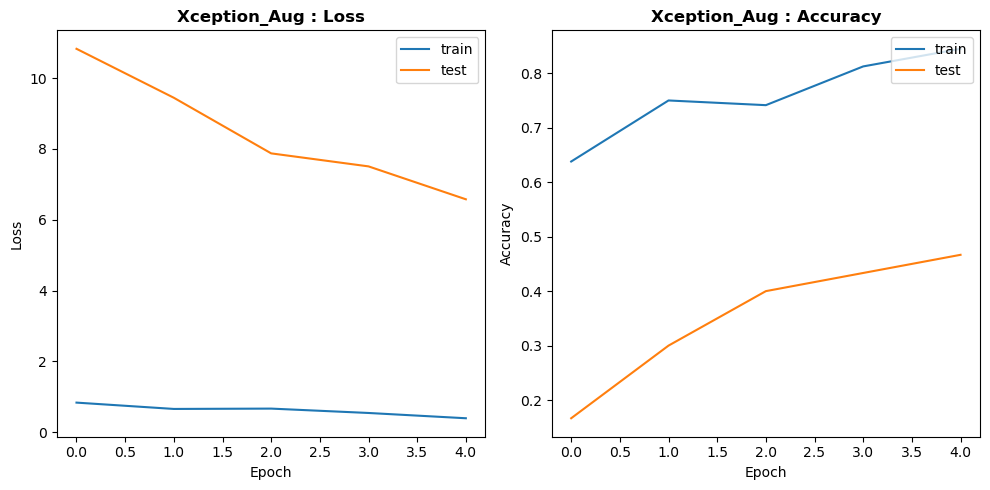

In [53]:
plot_performance(model_name='Xception_Aug',
                acc=xception_history_aug.history['accuracy'], 
                 val_acc=xception_history_aug.history['val_accuracy'],
                 loss=xception_history_aug.history['loss'], 
                 val_loss=xception_history_aug.history['val_loss'])

In [54]:
xception_model.load_weights('xception_aug.weights.best.keras')

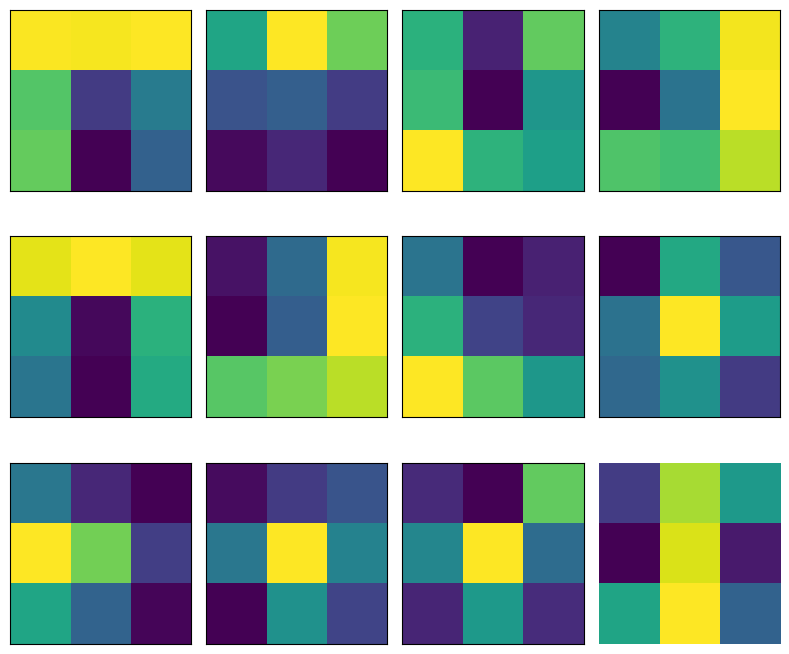

In [55]:
fig, ax= plt.subplots(3,4, figsize=(8,8))

for i, ax in zip(range(12), ax.flatten()):

  conv1=xception_model.layers[0]
  weights1 = conv1.get_weights()
  kernels1 = weights1[0]
  kernel1_1 = kernels1[:,:,0,i]
  ax.imshow(kernel1_1)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.tight_layout()
  plt.axis('off');

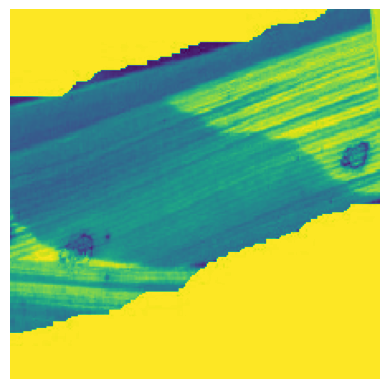

In [57]:
image = tf.keras.utils.load_img(r'C:\Users\PARI\Downloads\rice_leaf_diseases\Brown spot\DSC_0112.jpg', target_size=input_shape_2D)
input_arr = tf.keras.utils.img_to_array(image)/255
image = input_arr[:, :, 1]
plt.imshow(image)
plt.axis('off');

In [58]:
import numpy as np

def convolution(image, kernel):
    # Get the size of the kernel
    kernel_size = kernel.shape[0]

    # Calculate the size of the output image
    output_size = image.shape[0] - kernel_size + 1

    # Initialize the output image
    output_image = np.zeros((output_size, output_size))

    # Pad the image with zeros
    padded_image = np.pad(image, ((kernel_size-1)//2, (kernel_size-1)//2), 'constant')

    # Apply the convolution operation
    for ii in range(output_size):
        for jj in range(output_size):
            window = padded_image[ii:ii+kernel_size, jj:jj+kernel_size]
            output_image[ii, jj] = np.sum(window * kernel)

    return output_image

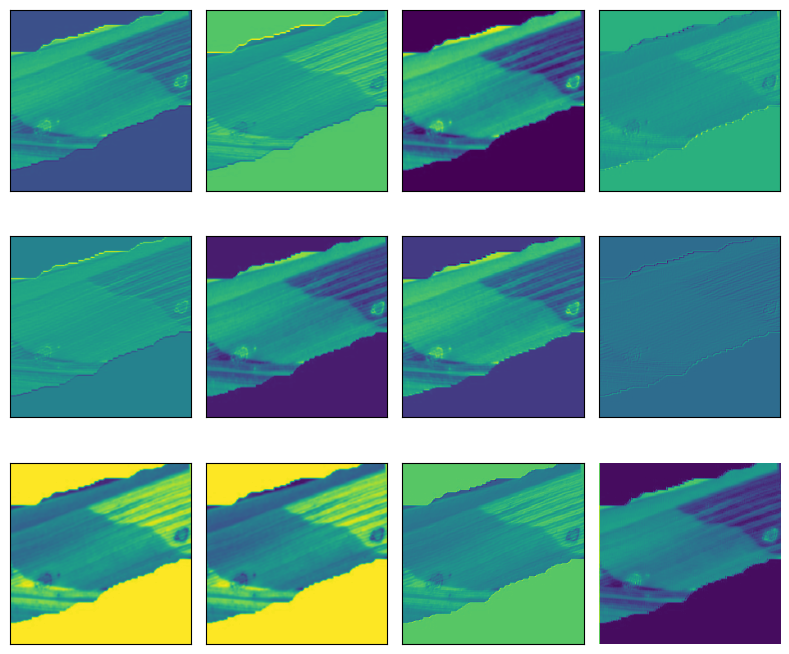

In [59]:
fig, ax= plt.subplots(3,4, figsize=(8,8))

for i, ax in zip(range(12), ax.flatten()):

  conv1=xception_model.layers[0]
  weights1 = conv1.get_weights()
  kernels1 = weights1[0]
  kernel1_1 = kernels1[:,:,0,i]

  output=convolution(image, kernel1_1)

  ax.imshow(output)
  ax.set_xticks([])
  ax.set_yticks([])
  plt.tight_layout()
  plt.axis('off');


In [60]:
y_hat = xception_model.predict(X_test)

# define text labels
labels = data_ds.class_names

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


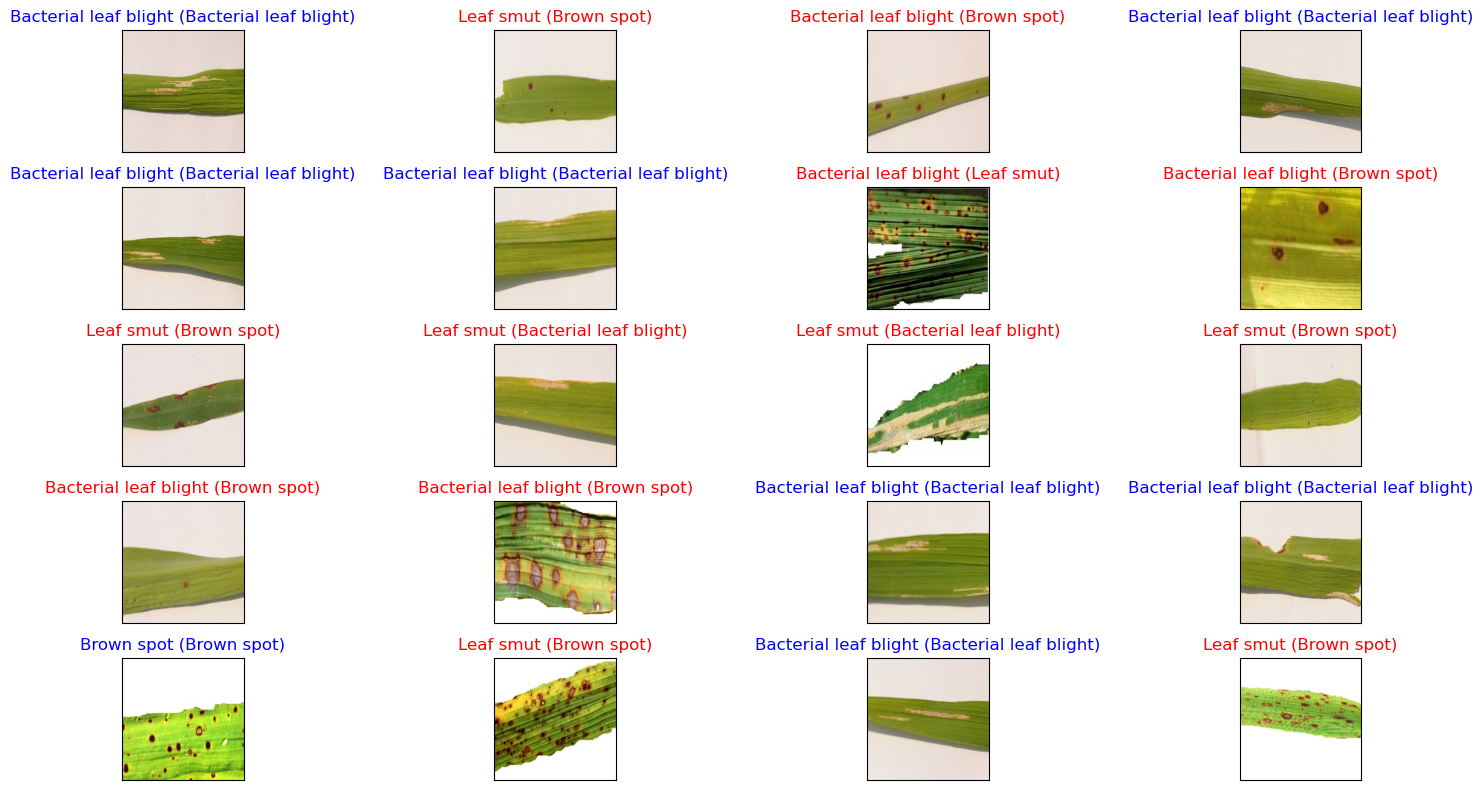

In [61]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(X_test.shape[0], size=20, replace=False)):
    ax = fig.add_subplot(5, 4, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(labels[pred_idx], labels[true_idx]),
                 color=("blue" if pred_idx == true_idx else "red"))
    plt.tight_layout()